# Criando um modelo classificar e avaliação

Utilizando uma base de dados do busca de pé iremos criar um modelo para classificar e avaliar os comentários.

## Importando a base de dados

https://www.kaggle.com/code/abnerfreitas/nlp-buscape-data-ptbr-sentiment-analysis/input

In [1]:
import pandas as pd

avaliacoes = pd.read_csv('b2w.csv')

In [2]:
avaliacoes.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


## Limpeza da base de dados

Retirando as colunas que não são necessárias.

In [3]:
avaliacoes = avaliacoes.drop(['original_index', 'review_text_processed', 'review_text_tokenized', 'rating', 'kfold_polarity', 'kfold_rating'], axis=1)

In [4]:
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
4,Além de higiênico tem o tamanho ideal. Só falt...,NaN


Remevendo as colunas com valores nulos.

In [5]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_text  132373 non-null  object 
 1   polarity     116058 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [6]:
avaliacoes.isnull().all().count().sum()

2

In [7]:
avaliacoes.dropna(inplace=True, axis=0)
avaliacoes

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0
...,...,...
132367,"Ótimo jogo, um dos melhores que joguei. Entreg...",1.0
132368,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,1.0
132369,Eu estou muito chateado com isso gostaria que ...,0.0
132371,O produto anunciado no site dizia ser 100% al...,0.0


In [8]:
# avaliacoes.polarity.value_counts()
avaliacoes['polarity'].value_counts()

polarity
1.0    80300
0.0    35758
Name: count, dtype: int64

## Separando os dados de treino e teste

In [9]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(avaliacoes.review_text, avaliacoes.polarity,
                                                              stratify=avaliacoes.polarity,
                                                              random_state=71)

In [10]:
classe_teste

70278     1.0
115089    1.0
128187    0.0
68697     0.0
50025     1.0
         ... 
25617     1.0
106407    1.0
26220     1.0
109010    0.0
49437     0.0
Name: polarity, Length: 29015, dtype: float64

## Criando um modelo

In [ ]:
# Linear Model - Logistic Regression
# from sklearn.linear_model import LogisticRegression

# regressao_ligistica = LogisticRegression()
# regressao_ligistica.fit(treino, classe_treino)
# acuracia = regressao_ligistica.score(teste, classe_teste)
# print(acuracia)

ValueError: could not convert string to float: 'Simples e eficiente, bateria bastante durável, ótimo custo benefício para uso básico.'

In [11]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Este produto é muito bom', 'Este produto é muito ruim']
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [12]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [13]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [14]:
matriz_esparsa

,bom,este,muito,produto,ruim
0,1,1,1,1,0
1,0,1,1,1,1


Vamos aplicar o bag of words na nossa base

In [15]:
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 50508)


116058 -> quatidade de linhas<br/>
50508 -> quantidade de palavras únicas

In [16]:
vetorizar = CountVectorizer(max_features=100) # max_features -> limitando para as 100 palavras que mais se repetem
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [17]:
from sklearn.linear_model import LogisticRegression

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              avaliacoes.polarity,
                                                              stratify=avaliacoes.polarity,
                                                              random_state=71)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.8870239531276926


In [92]:
from sklearn.linear_model import LogisticRegression

def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features=100) # max_features -> limitando para as 100 palavras que mais se repetem
  bag_of_words = vetorizar.fit_transform(avaliacoes[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              avaliacoes[coluna_sentimento],
                                                              stratify=avaliacoes[coluna_sentimento],
                                                              random_state=71)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)


In [19]:
print(treinar_modelo(avaliacoes, 'review_text', 'polarity'))

0.8870239531276926


# World Cloud

Visualizando as principais reviews com uma word cloud.

https://github.com/amueller/word_cloud

In [20]:
from wordcloud import WordCloud

todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)

In [21]:
len(todas_avaliacoes)

116058

In [22]:
len(todas_palavras)

16570763

In [23]:
nuvem_palavras = WordCloud().generate(todas_palavras)

In [24]:
nuvem_palavras

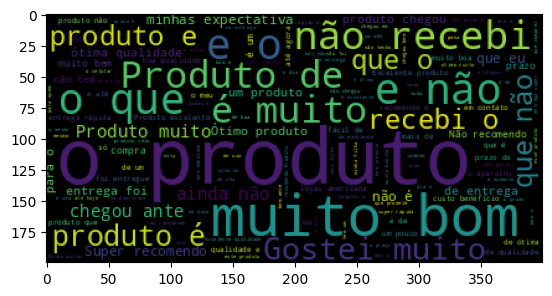

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)

In [ ]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)

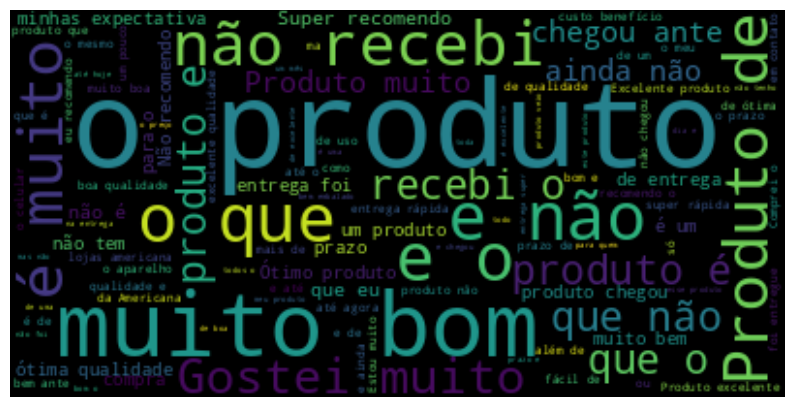

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

## Avaliações negativas e positivas

In [25]:
def word_cloud_neg(dados, coluna_texto):
  texto_negativo = dados.query('polarity == 0')
  todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  # collocations -> retira as palvras em conjunto (ex: muito bom) e deixa somente palavras únicas
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [26]:
def word_cloud_pos(dados, coluna_texto):
  texto_positivo = dados.query('polarity == 1')
  todas_avaliacoes = [texto for texto in texto_positivo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  # collocations -> retira as palvras em conjunto (ex: muito bom) e deixa somente palavras únicas
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

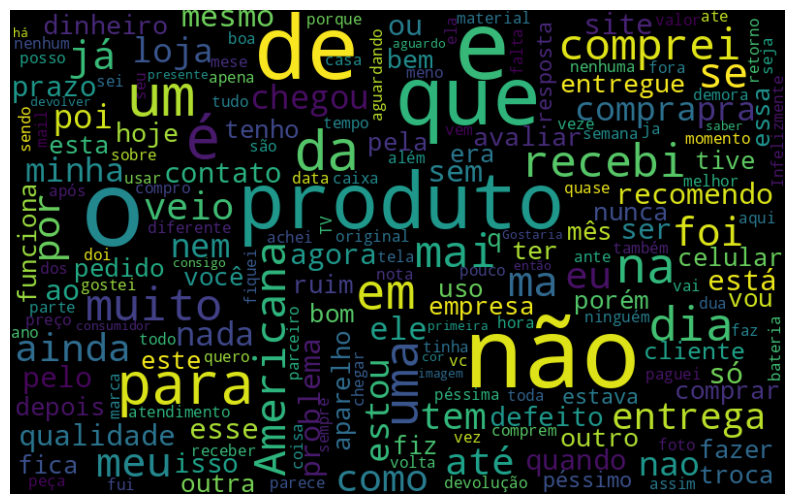

In [ ]:
word_cloud_neg(avaliacoes, 'review_text')

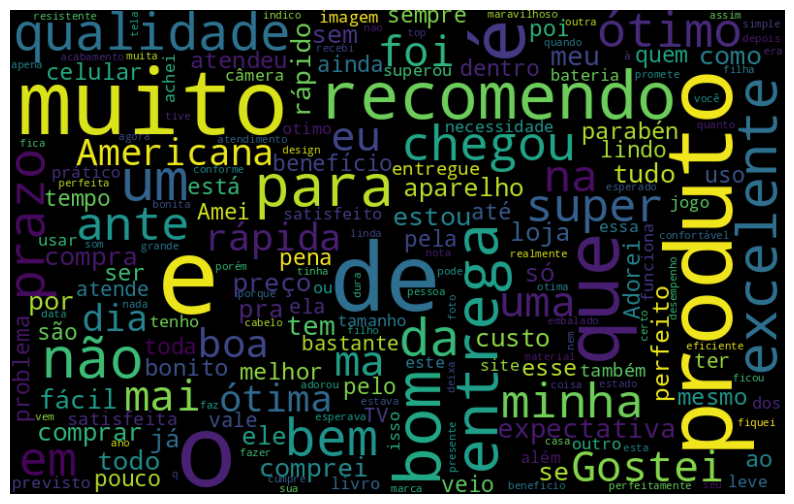

In [ ]:
word_cloud_pos(avaliacoes, 'review_text')

OBS: nos gráficos existem as **stop words**, que são palavras que não fazem muito sentido na avalição do gráfico. Ex: na, dos, ao, já, ...

# NLTK

(chatgpt)<br/>
A biblioteca NLTK (Natural Language Toolkit) é uma das bibliotecas mais populares em Python para processamento de linguagem natural. Ela oferece uma variedade de ferramentas para trabalhar com textos em várias línguas, com aplicações em áreas como análise de sentimentos, extração de informações e análise semântica.

Recursos principais da NLTK:

* Tokenização: Dividir um texto em unidades linguísticas, como palavras ou sentenças.
* Stemming e lematização: Reduzir palavras à sua forma base (radical) ou forma léxica (lemma).
* Remoção de stopwords: Remover palavras comuns (como artigos e preposições) que não contribuem para o significado do texto.
* Part-of-Speech Tagging: Atribuir etiquetas gramaticais a cada palavra de um texto.
* Chunking: Identificar frases ou trechos de texto com base em suas partes do discurso.
* Classificação e análise de sentimentos: Ferramentas para classificar textos ou analisar sentimentos expressos em textos.
* Corpora e léxicos: Conjuntos de textos anotados e dicionários para ajudar nas tarefas de processamento de linguagem natural.

A NLTK é frequentemente usada em conjunto com outras bibliotecas de aprendizado de máquina para construir modelos mais complexos. É uma biblioteca de grande importância para pesquisadores e profissionais que trabalham com textos e análise de dados textuais.

In [27]:
# https://www.nltk.org/

import nltk
nltk.download("all") # baixa todos pacotes de dados do nltk

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [29]:
# Contando a frequência das frases

corpus = ["Muito este produto", "Muito ruim este produto"]
frequencia = nltk.FreqDist(corpus)
frequencia

FreqDist({'Muito este produto': 1, 'Muito ruim este produto': 1})

In [30]:
from nltk import tokenize

frase = "Muito bom este produto"

token_por_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_por_espaco.tokenize(frase) # ira gerar um array separando as strings pelo espaço
token_frase

['Muito', 'bom', 'este', 'produto']

In [31]:
token_por_espaco = tokenize.WhitespaceTokenizer()
token_dataset = token_por_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_dataset)

In [32]:
frequencia

FreqDist({'e': 89308, 'o': 76053, 'de': 75791, 'a': 66640, 'que': 53574, 'não': 44253, 'do': 36776, 'muito': 36566, 'é': 36314, 'produto': 34983, ...})

In [33]:
dataframe_frequencia = pd.DataFrame({'palavra': list(frequencia.keys()), 'frequencia': list(frequencia.values())})

In [34]:
dataframe_frequencia.head()

,palavra,frequencia
0,Bem,413
1,macio,216
2,e,89308
3,felpudo...recomendo.,1
4,Preço,334


In [36]:
# listar as palavras mais frequêntes
dataframe_frequencia.nlargest(columns='frequencia', n=10)

,palavra,frequencia
2,e,89308
20,o,76053
17,de,75791
39,a,66640
50,que,53574
33,não,44253
23,do,36776
43,muito,36566
60,é,36314
21,produto,34983


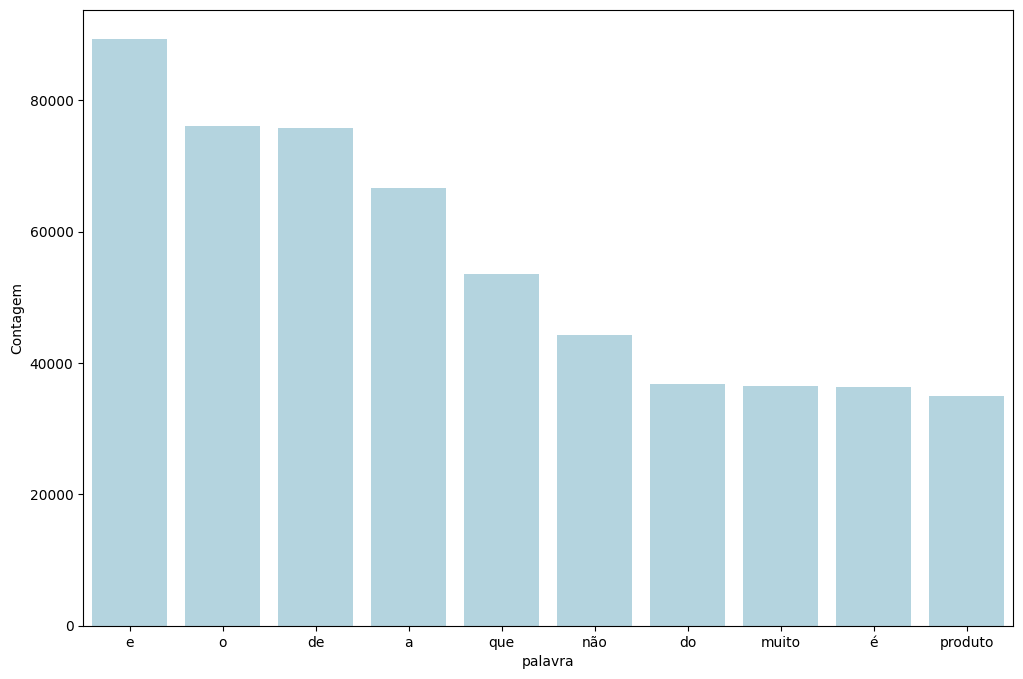

In [40]:
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.barplot(data = dataframe_frequencia.nlargest(columns='frequencia', n=10), x='palavra', y='frequencia', color='lightblue')
ax.set(ylabel='Contagem')
plt.show()

In [43]:
def grafico(dados, coluna_texto, quantidade):
  todas_palavras = ' '.join(texto for texto in dados[coluna_texto])
  token_frase = token_por_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  dataframe_frequencia = pd.DataFrame({'palavra': list(frequencia.keys()), 'frequencia': list(frequencia.values())})
  dataframe_frequencia = dataframe_frequencia.nlargest(columns='frequencia', n=quantidade)

  plt.figure(figsize=(12, 8))
  ax = sns.barplot(data = dataframe_frequencia, x='palavra', y='frequencia', color='lightblue')
  ax.set(ylabel='Contagem')
  plt.show()

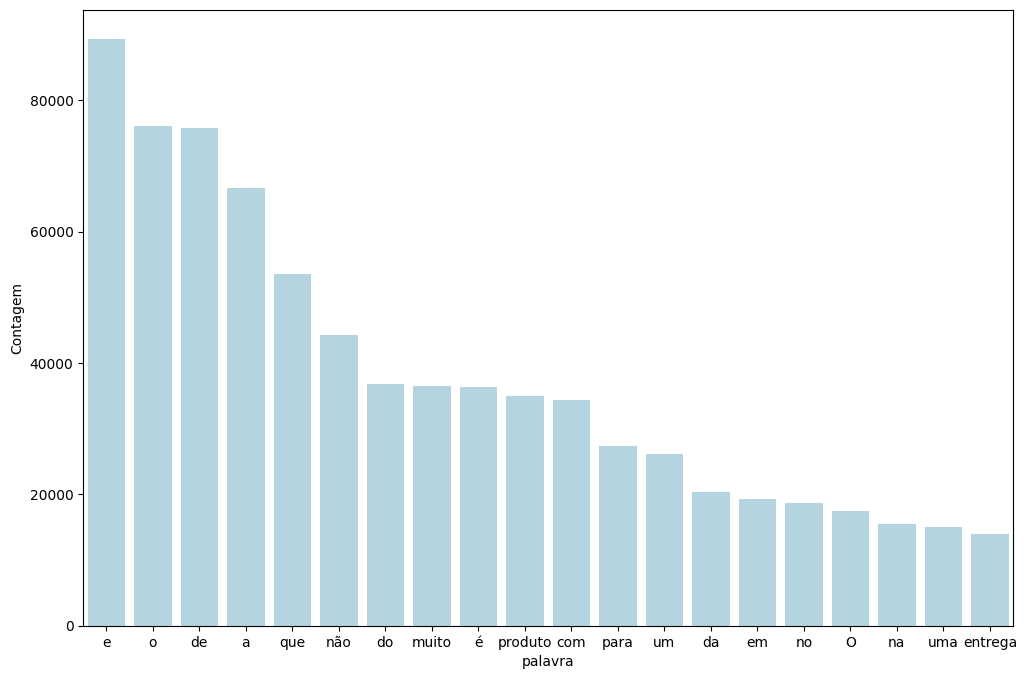

In [44]:
grafico(avaliacoes, 'review_text', 20)

# Remoção de Stop Words

In [45]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [94]:
frase_processada = list()
for avaliacao in avaliacoes.review_text:
  nova_frase = list()
  palavras_texto  = token_por_espaco.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords'] = frase_processada

In [95]:
avaliacoes.head()

,review_text,polarity,texto_sem_stopwords,texto_sem_stopwords_e_pontuacao,texto_sem_stopwords_e_pontuacao_e_acentos
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,bem macio felpudo ... recomendo preço imbatíve...,bem macio felpudo ... recomendo preco imbative...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,produto excepcional recomendo !!! inovador gos...,produto excepcional recomendo !!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,bom custo beneficio adequado pessoas fazem uso...,bom custo beneficio adequado pessoas fazem uso...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...


In [96]:
treinar_modelo(avaliacoes, 'texto_sem_stopwords', 'polarity')

0.8790970187833879

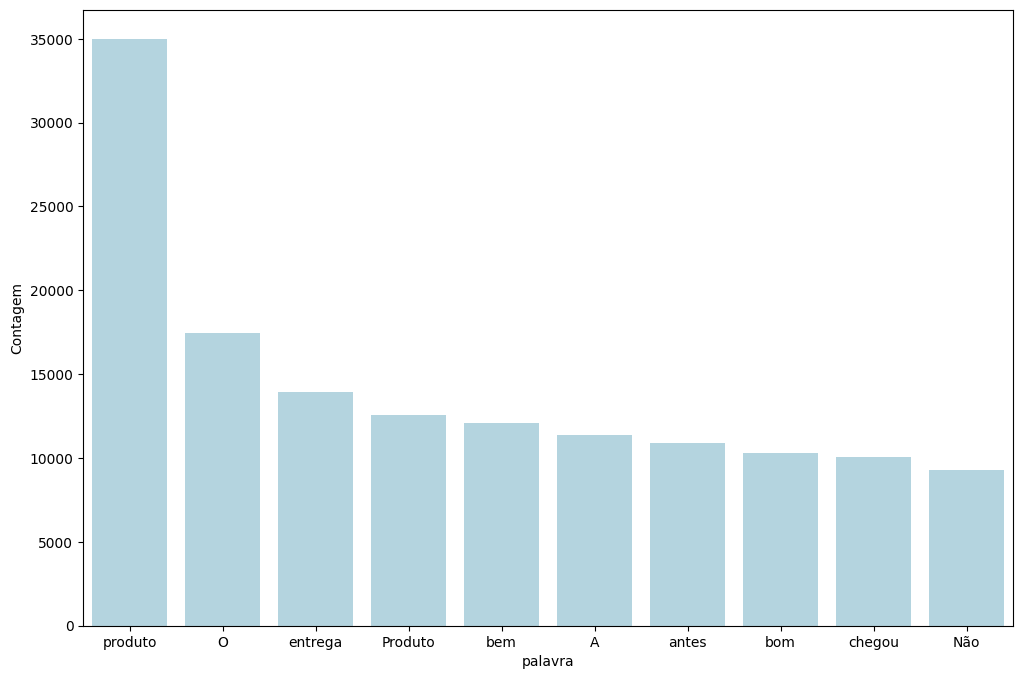

In [50]:
grafico(avaliacoes, 'texto_sem_stopwords', 10)

In [51]:
# removendo pontuacoes e acentuacao
from nltk import tokenize

frase = 'Muito bom, este produto.'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

token_frase

['Muito', 'bom', ',', 'este', 'produto', '.']

In [52]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [97]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [98]:
# concatenando a lista pontuacao com palavras_irrelevantes
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords:
  nova_frase = list()
  palavras_texto  = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords_e_pontuacao'] = frase_processada

In [99]:
avaliacoes.head()

,review_text,polarity,texto_sem_stopwords,texto_sem_stopwords_e_pontuacao,texto_sem_stopwords_e_pontuacao_e_acentos
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo ... recomendo Preço imbatíve...,bem macio felpudo ... recomendo preco imbative...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional recomendo !!! inovador gos...,produto excepcional recomendo !!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio Adequado pessoas fazem uso...,bom custo beneficio adequado pessoas fazem uso...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...


In [100]:
avaliacoes.texto_sem_stopwords[5]

'ótmo produto atendeu expectativas, entrega ocorreu antes previsto. bom'

In [101]:
avaliacoes.texto_sem_stopwords_e_pontuacao[5]

'ótmo produto atendeu expectativas entrega ocorreu antes previsto bom'

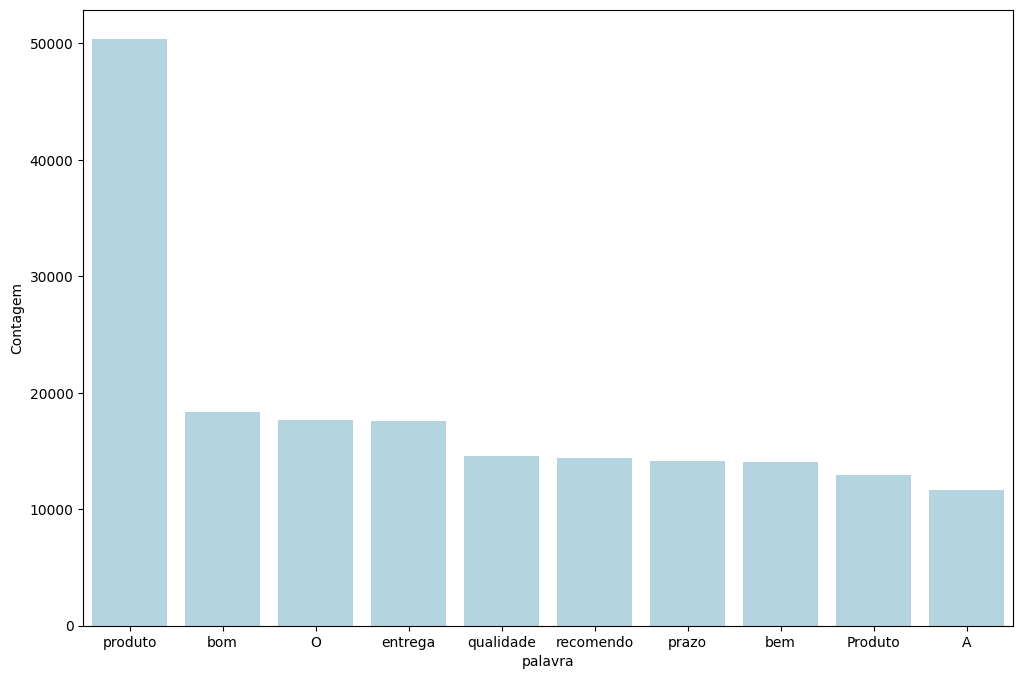

In [102]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao", 10)

In [73]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.9 MB/s eta 0:00:00


In [74]:
import unidecode

acentos = "ótimo péssimo não tão é"

teste = unidecode.unidecode(acentos)
teste

'otimo pessimo nao tao e'

In [103]:
sem_acentos = [unidecode.unidecode(texto) for texto in avaliacoes.texto_sem_stopwords_e_pontuacao]

In [104]:
sem_acentos[4]

'otmo produto atendeu expectativas entrega ocorreu antes previsto bom'

In [105]:
avaliacoes.texto_sem_stopwords_e_pontuacao[5]

'ótmo produto atendeu expectativas entrega ocorreu antes previsto bom'

In [106]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [107]:
avaliacoes['texto_sem_stopwords_e_pontuacao_e_acentos'] = sem_acentos

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  palavras_texto  = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords_e_pontuacao_e_acentos'] = frase_processada

In [108]:
avaliacoes.head(10)

,review_text,polarity,texto_sem_stopwords,texto_sem_stopwords_e_pontuacao,texto_sem_stopwords_e_pontuacao_e_acentos
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo ... recomendo Preço imbatíve...,Bem macio felpudo ... recomendo Preco imbative...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional recomendo !!! inovador gos...,Produto excepcional recomendo !!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio Adequado pessoas fazem uso...,Bom custo beneficio Adequado pessoas fazem uso...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...
6,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...",1.0,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...",GOSTEI MUITO DO PRODUTO TEM ÓTIMA QUALIDADE E ...,GOSTEI MUITO DO PRODUTO TEM OTIMA QUALIDADE E ...
7,"Adorei, entrega no prazo e produto conforme eu...",1.0,"Adorei, entrega prazo produto conforme esperav...",Adorei entrega prazo produto conforme esperava...,Adorei entrega prazo produto conforme esperava...
8,Já é o segundo processador deste modelo que co...,1.0,Já segundo processador deste modelo compro (o ...,Já segundo processador deste modelo compro pri...,Ja segundo processador deste modelo compro pri...
9,Nao recebi!!! endereço para entrega : rua aug...,1.0,Nao recebi!!! endereço entrega : rua augusto h...,Nao recebi !!! endereço entrega rua augusto ho...,Nao recebi !!! endereco entrega rua augusto ho...
10,"Não compra este produto, pois o mesmo veio com...",0.0,"Não compra produto, pois veio botões travados ...",Não compra produto pois veio botões travados t...,Nao compra produto pois veio botoes travados t...


In [109]:
treinar_modelo(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos', 'polarity')

0.8825090470446321

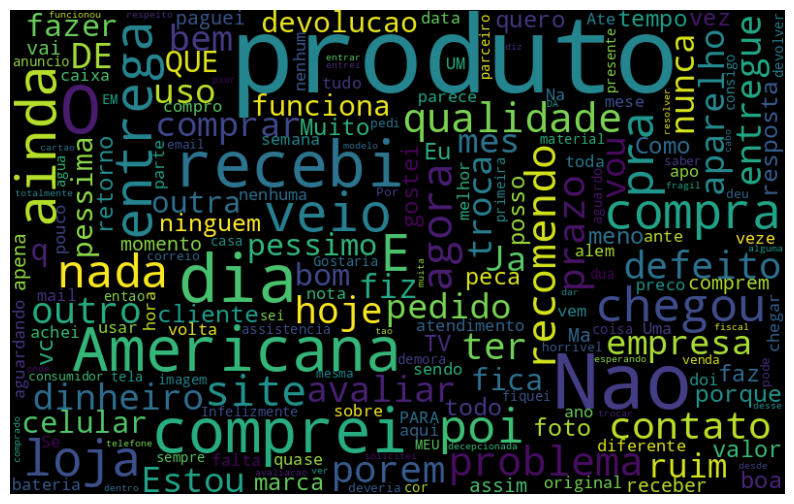

In [110]:
word_cloud_neg(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos')

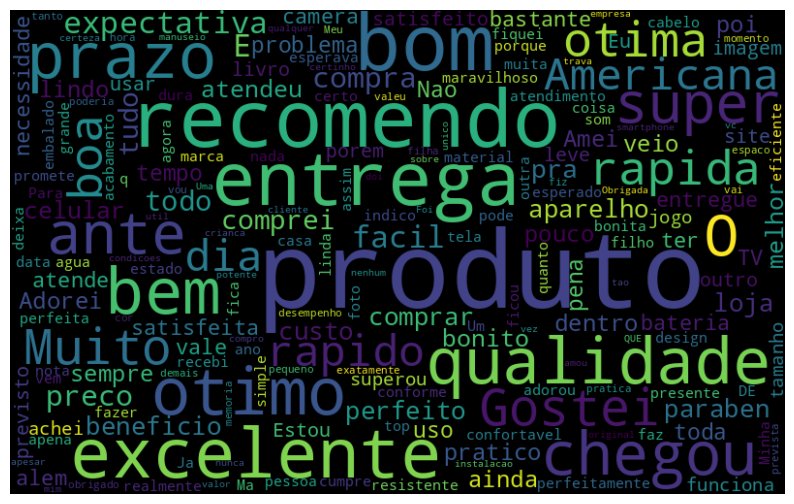

In [111]:
word_cloud_pos(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos')

In [112]:
frase = 'O Rato Roeu a Roupa do Rei de Roma'
print(frase.lower())

o rato roeu a roupa do rei de roma


In [113]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  avaliacao = avaliacao.lower()
  palavras_texto  = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords_e_pontuacao_e_acentos_minusculo'] = frase_processada

In [115]:
avaliacoes.head()

,review_text,polarity,texto_sem_stopwords,texto_sem_stopwords_e_pontuacao,texto_sem_stopwords_e_pontuacao_e_acentos,texto_sem_stopwords_e_pontuacao_e_acentos_minusculo
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo ... recomendo Preço imbatíve...,Bem macio felpudo ... recomendo Preco imbative...,bem macio felpudo ... recomendo preco imbative...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional recomendo !!! inovador gos...,Produto excepcional recomendo !!! inovador gos...,produto excepcional recomendo !!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio Adequado pessoas fazem uso...,Bom custo beneficio Adequado pessoas fazem uso...,bom custo beneficio adequado pessoas fazem uso...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...


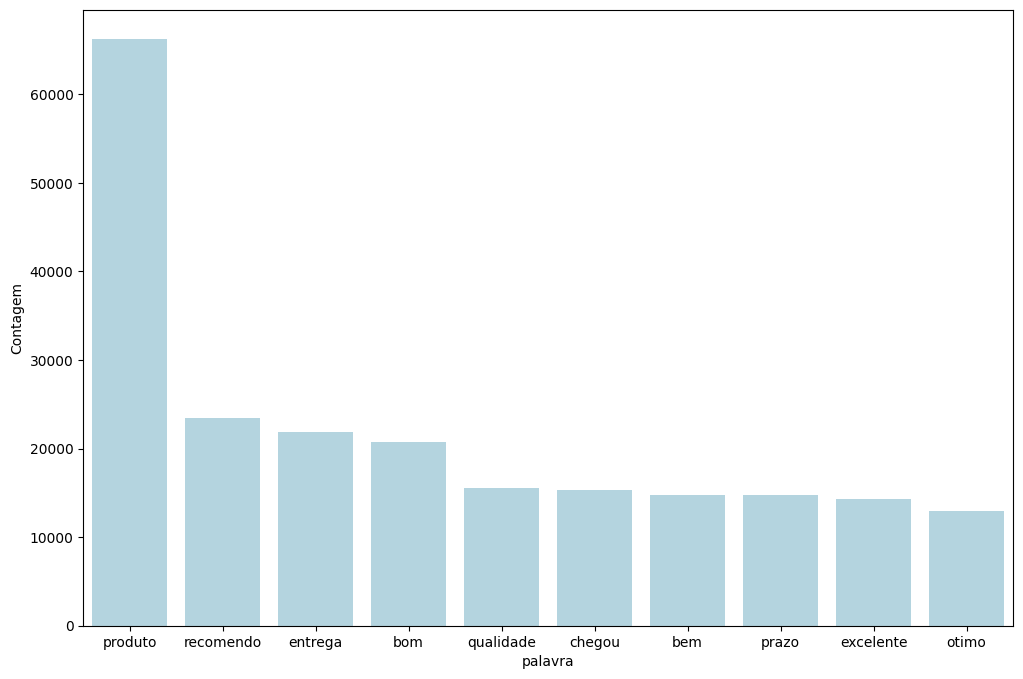

In [116]:
grafico(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos_minusculo', 10)

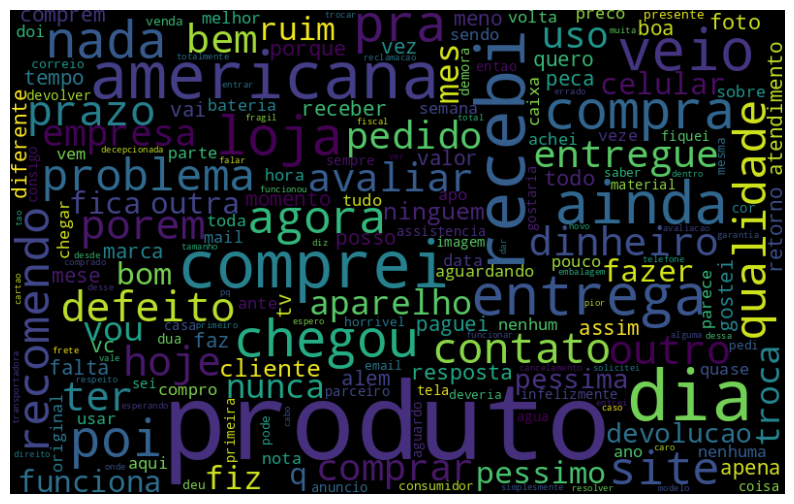

In [119]:
word_cloud_neg(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos_minusculo')

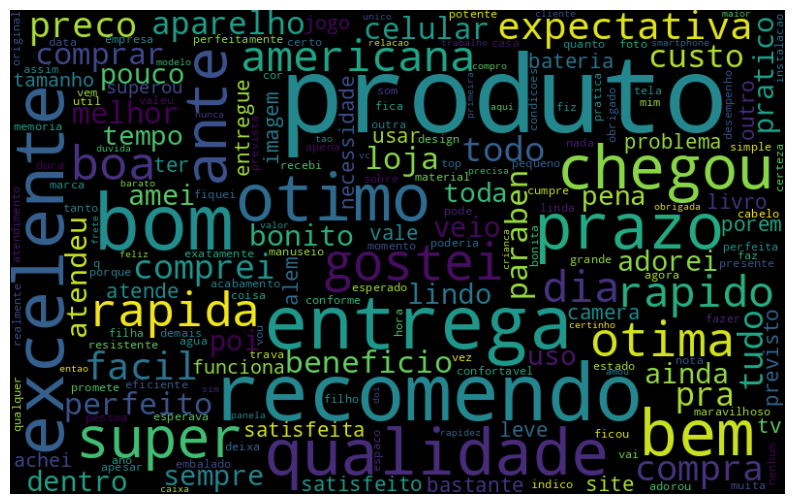

In [120]:
word_cloud_pos(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos_minusculo')

In [121]:
treinar_modelo(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos_minusculo', 'polarity')

0.8707909701878339